# Setup

First, lets import most if not all the modules we need. 

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

AttributeError: partially initialized module 'pandas' has no attribute 'compat' (most likely due to a circular import)

In [4]:
data = pd.read_csv('datasets/sentiment.csv',engine='python')

# we check how much null entries in each columns

print("data_is_null \n",data.isnull().sum())

# Keeping only the neccessary columns
data = data[['text','sentiment']]

data_is_null 
 candidate                       96
candidate:confidence             0
relevant_yn                      0
relevant_yn:confidence           0
sentiment                        0
sentiment:confidence             0
subject_matter                 326
subject_matter:confidence        0
candidate_gold               13843
name                             0
relevant_yn_gold             13839
retweet_count                    0
sentiment_gold               13856
subject_matter_gold          13853
text                             0
tweet_coord                  13850
tweet_created                    0
tweet_id                         0
tweet_location                3912
user_timezone                 4403
dtype: int64


And of course we will need TensorFlow:

In [5]:
data[:5]

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive


# Convolutional layer

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13871 entries, 0 to 13870
Data columns (total 2 columns):
text         13871 non-null object
sentiment    13871 non-null object
dtypes: object(2)
memory usage: 216.8+ KB


In [7]:
data.describe()


,text,sentiment
count,13871,13871
unique,10402,3
top,RT @RWSurferGirl: Jeb Bush reminds me of eleva...,Negative
freq,161,8493


In [8]:
data.columns


Index(['text', 'sentiment'], dtype='object')

In [9]:
data.dtypes


text         object
sentiment    object
dtype: object

In [10]:
data.isnull().sum()


text         0
sentiment    0
dtype: int64

In [11]:
print(data.size)
data[:5]

27742


,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive


In [23]:
#is there anything that you should not train with, values that in some way are invalid. 




data['text'] = data['text'].apply((lambda text: re.sub(r'.',r'',text)))

print(data['text'][:-1])
for idx,row in data.iterrows():
    #print(idx,row)
    row[0] = row[0].replace('rt',' ')
    
max_fatures = 10
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['text'].values)
X = tokenizer.texts_to_sequences(data['text'].values)
print(X[:5])


# pad: to make all input of same length
X = pad_sequences(X)
print(X[:5])

1              
3              
4              
5              
6              
8              
9              
10             
11         \n\n
12             
14             
15             
16             
17             
18             
19             
20             
21             
22             
24             
25             
26             
27             
28             
29             
30             
31             
34             
35             
36           \n
          ...  
13838          
13839          
13840          
13841          
13843          
13844          
13845          
13847          
13848        \n
13849          
13850          
13851          
13852          
13853          
13854          
13855          
13856          
13857          
13858          
13859          
13860          
13861          
13862          
13863          
13864          
13865          
13866          
13867    \n\n\n
13868          
13869          
Name: text, Length: 1072

## Simple example

In [3]:
# Keras offers an Embedding layer that can be used for neural networks on text data.
'''
source from: machinelearningmastery.com
The Embedding layer is defined as the first hidden layer of a network. It must specify 3 arguments:

It must specify 3 arguments:

input_dim: This is the size of the vocabulary in the text data. For example, if your data is integer encoded to values between 0-10, then the size of the vocabulary would be 11 words.
output_dim: This is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word. For example, it could be 32 or 100 or even larger. Test different values for your problem.
input_length: This is the length of input sequences, as you would define for any input layer of a Keras model. For example, if all of your input documents are comprised of 1000 words, this would be 1000.
For example, below we define an Embedding layer with a vocabulary of 200 (e.g. integer encoded words from 0 to 199, inclusive), a vector space of 32 dimensions in which words will be embedded, and input documents that have 50 words each.


e = Embedding(200, 32, input_length=50)
1
e = Embedding(200, 32, input_length=50)


'''
embed_dim = 128
lstm_out = 196
import time
model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(Dense(80)
model.add(Dense(40)
model.add(Dense(2,activation='softmax'))
start=time.time()
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
# Loss ser hvor mye feil/riktig en gitt gjennomgkjøring er
# optimizeren er den som velger hvordan man skal gjennomføre forbedringen før neste gjennomkjøring
# metrics er hvilken ting som modelen skal måles etter. 
#Activation er hvordan man presser tall fra -uendeling - endeling inn i området [0,1]
print("Time to compile model:",time.time()-start)
print(model.summary())

SyntaxError: invalid syntax (<ipython-input-3-518578c8e187>, line 26)

In [14]:
print((data['sentiment']).values)
Y = pd.get_dummies(data['sentiment']).values
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.15, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

['Positive' 'Positive' 'Positive' ... 'Positive' 'Negative' 'Positive']
[[0 1]
 [0 1]
 [0 1]
 ...
 [0 1]
 [1 0]
 [0 1]]
(9119, 28) (9119, 2)
(1610, 28) (1610, 2)


Using `tf.layers.conv2d()`:

In [15]:
from tqdm import tqdm
batch_size = 32
tqdm(model.fit(X_train, Y_train, epochs = 7, batch_size=batch_size, verbose = 2))

Instructions for updating:
Use tf.cast instead.
Epoch 1/7
 - 14s - loss: 0.4312 - acc: 0.8173
Epoch 2/7
 - 13s - loss: 0.3157 - acc: 0.8670
Epoch 3/7
 - 14s - loss: 0.2797 - acc: 0.8838
Epoch 4/7
 - 15s - loss: 0.2528 - acc: 0.8952
Epoch 5/7
 - 13s - loss: 0.2339 - acc: 0.9044
Epoch 6/7
 - 13s - loss: 0.2187 - acc: 0.9091
Epoch 7/7
 - 13s - loss: 0.2010 - acc: 0.9169
0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [14]:
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

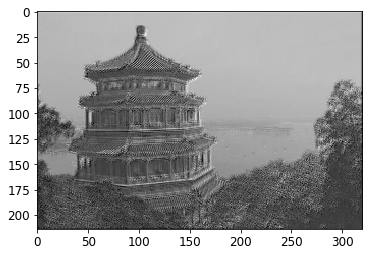

In [15]:
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
for x in range(len(X_validate)):
    
    result = model.predict(X_validate[x].reshape(1,X_test.shape[1]),batch_size=1,verbose = 2)[0]
   
    if np.argmax(result) == np.argmax(Y_validate[x]):
        if np.argmax(Y_validate[x]) == 0:
            neg_correct += 1
        else:
            pos_correct += 1
       
    if np.argmax(Y_validate[x]) == 0:
        neg_cnt += 1
    else:
        pos_cnt += 1



print("pos_acc", pos_correct/pos_cnt*100, "%")
print("neg_acc", neg_correct/neg_cnt*100, "%")

## VALID vs SAME padding

In [16]:
twt = ['Meetings: ram is a good man.']
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=28, dtype='int32', value=0)
print(twt)
sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

VALID:
 [[[[184.]
   [389.]]]]
SAME:
 [[[[143.]
   [348.]
   [204.]]]]
